In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
data=pd.read_csv('diabetes_data.csv')
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [34]:
data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

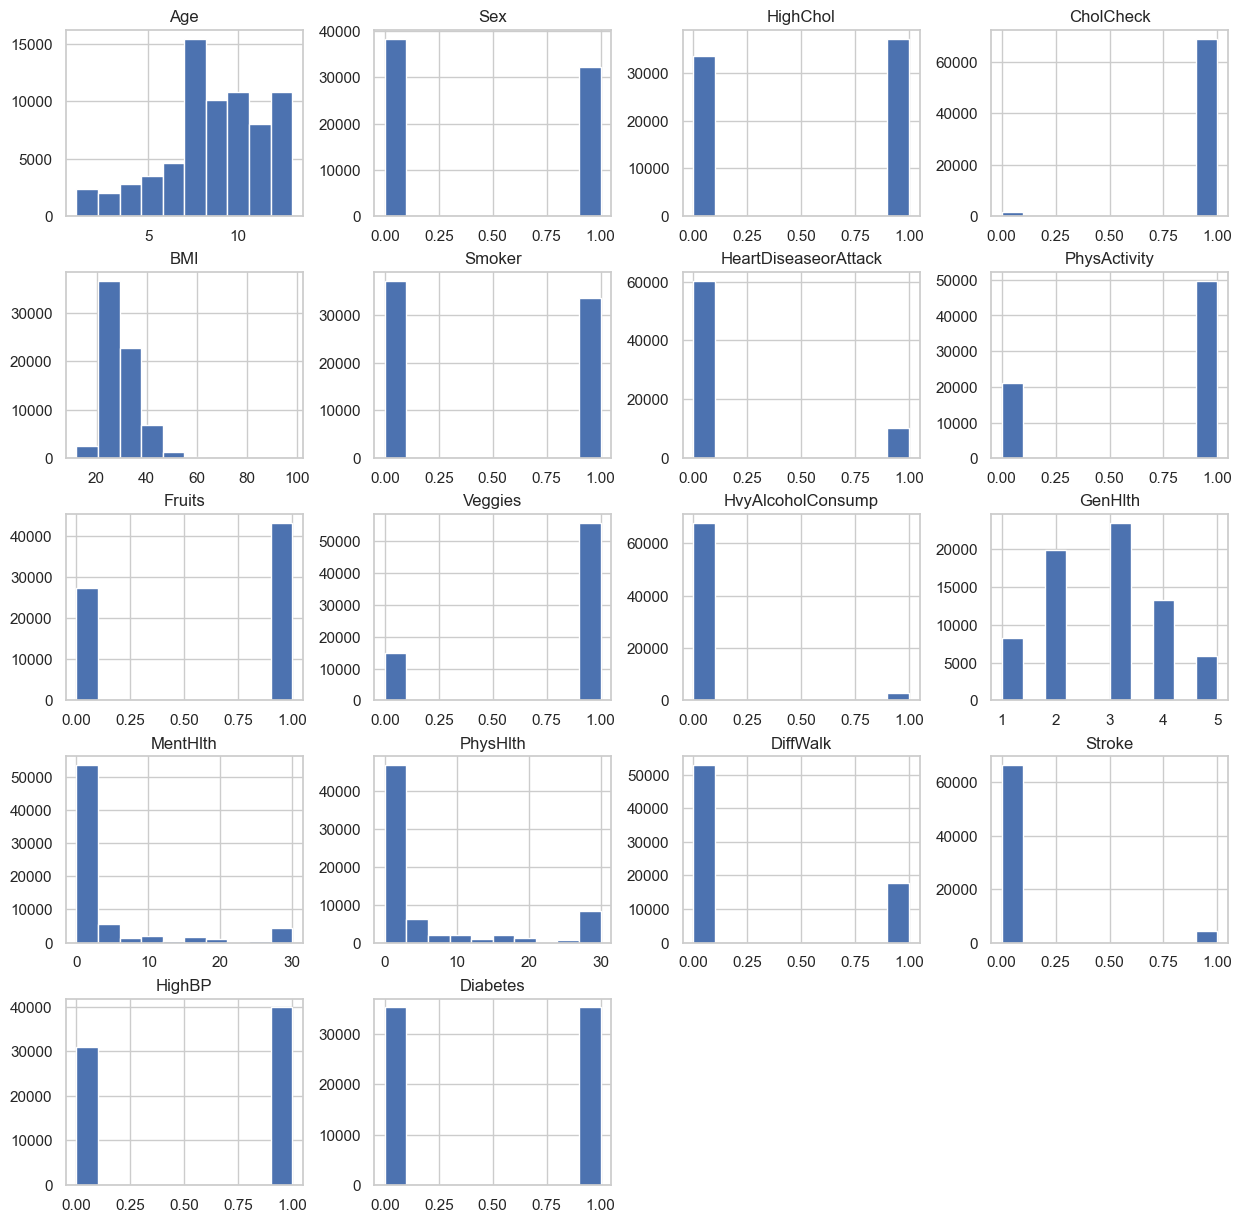

In [35]:
data.hist(bins=10,figsize=(15,15))
plt.show()

<AxesSubplot:>

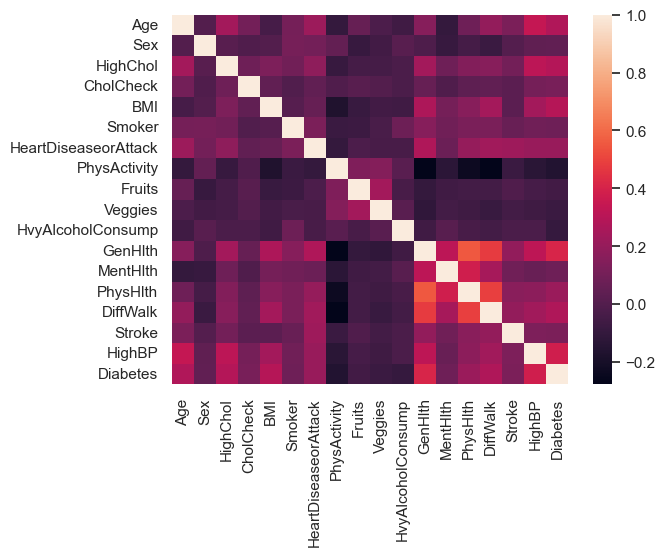

In [36]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='count', ylabel='Diabetes'>

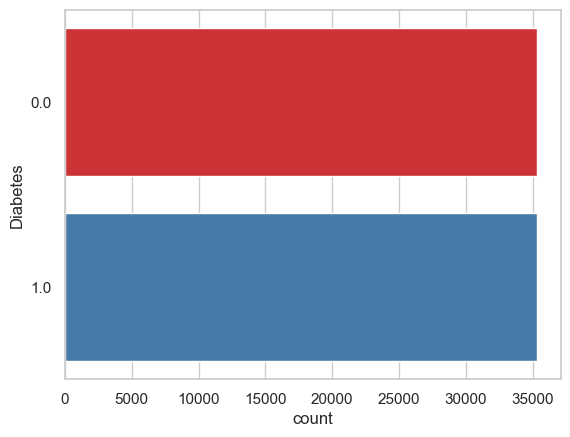

In [37]:
sns.countplot(y=data['Diabetes'],palette='Set1')

<AxesSubplot:>

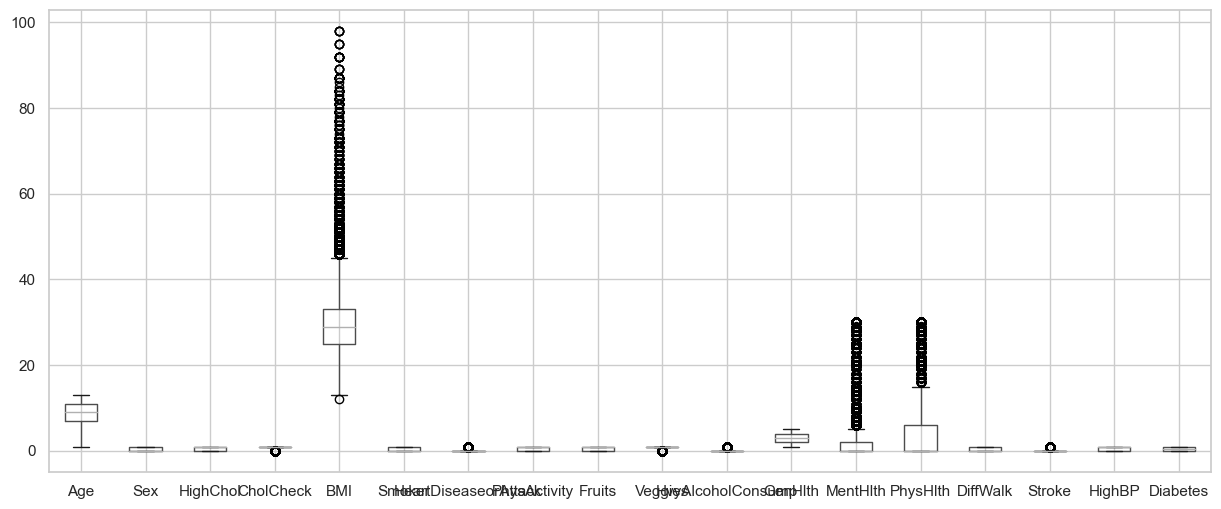

In [38]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

In [39]:
#Outliers removal

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---dQ1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR--- \n",IQR)

---dQ1--- 
 Age                      7.0
Sex                      0.0
HighChol                 0.0
CholCheck                1.0
BMI                     25.0
Smoker                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             0.0
Fruits                   0.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Stroke                   0.0
HighBP                   0.0
Diabetes                 0.0
Name: 0.25, dtype: float64

---Q3--- 
 Age                     11.0
Sex                      1.0
HighChol                 1.0
CholCheck                1.0
BMI                     33.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  4.0
MentHlth                 2.0
PhysHlth                 6.0
DiffWalk             

In [40]:
data.shape

(70692, 18)

In [41]:
#diabetes_dataset

data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

((70692, 18), (33178, 18))

In [42]:
print(data_out[data_out['Diabetes'] == 0])

        Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
7       6.0  1.0       0.0        1.0  31.0     1.0                   0.0   
8       3.0  0.0       0.0        1.0  32.0     0.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
35336   3.0  1.0       0.0        1.0  24.0     0.0                   0.0   
35339   7.0  0.0       0.0        1.0  40.0     1.0                   0.0   
35341  12.0  0.0       0.0        1.0  23.0     0.0                   0.0   
35342   6.0  1.0       0.0        1.0  29.0     0.0                   0.0   
35345   2.0  0.0       0.0        1.0  20.0     0.0                   0.0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth 

In [43]:
#diabetes_dataset

X=data_out.drop(columns=['Diabetes'])
y=data_out['Diabetes']

In [44]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)

In [45]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((23224, 17), (9954, 17), (23224,), (9954,))

In [46]:
norm=MinMaxScaler().fit(train_X)
train_X_norm=norm.transform(train_X)
test_X_norm=norm.transform(test_X)

In [47]:
train_X_norm

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41666667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [48]:
test_X_norm

array([[0.58333333, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.41666667, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [49]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM model
model = SVC(kernel='linear', C=1.0, gamma='auto')

# Train the model
model.fit(train_X_norm, train_y)

# Make predictions on the testing set
y_pred1 = model.predict(test_X_norm)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 74.62%


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred1)
cm

array([[4619, 1260],
       [1266, 2809]], dtype=int64)

Text(92.25, 0.5, 'Truth')

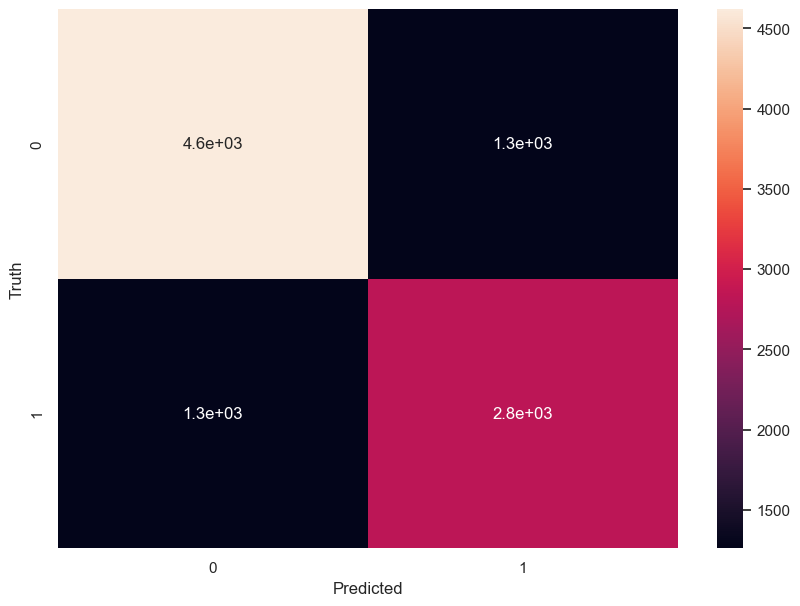

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:

tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.3107
Sensitivity: 0.6893
Specificity: 0.7857
Positive predictive value: 0.6903
Negative predictive value: 0.7849
False positive rate: 0.2143
False negative rate: 0.3107
F1 score: 0.6898


In [53]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=train_X_norm.shape[1]))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN
classifier.fit(train_X_norm, train_y, batch_size=10, epochs=10)

# Predict test set results
y_pred2 = classifier.predict(test_X_norm)
for i in range(len(y_pred2)):
    if(y_pred2[i] > 0.5):
        y_pred2[i] = 1
    else:
        y_pred2[i] = 0
y_pred = y_pred2
accuracy = accuracy_score(test_y, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy*100))

Epoch 1/10
2323/2323 [==============================] - 3s 908us/step - loss: 0.5782 - accuracy: 0.6876
Epoch 2/10
2323/2323 [==============================] - 2s 874us/step - loss: 0.5277 - accuracy: 0.7346
Epoch 3/10
2323/2323 [==============================] - 2s 755us/step - loss: 0.5163 - accuracy: 0.7398
Epoch 4/10
2323/2323 [==============================] - 2s 767us/step - loss: 0.5135 - accuracy: 0.7417
Epoch 5/10
2323/2323 [==============================] - 2s 799us/step - loss: 0.5126 - accuracy: 0.7413
Epoch 6/10
2323/2323 [==============================] - 2s 814us/step - loss: 0.5124 - accuracy: 0.7410
Epoch 7/10
2323/2323 [==============================] - 2s 829us/step - loss: 0.5115 - accuracy: 0.7439
Epoch 8/10
2323/2323 [==============================] - 2s 817us/step - loss: 0.5115 - accuracy: 0.7427
Epoch 9/10
2323/2323 [==============================] - 2s 791us/step - loss: 0.5110 - accuracy: 0.7412
Epoch 10/10
312/312 [==============================] - 0s 715us/

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred2)
cm

array([[4332, 1547],
       [ 987, 3088]], dtype=int64)

Text(92.25, 0.5, 'Truth')

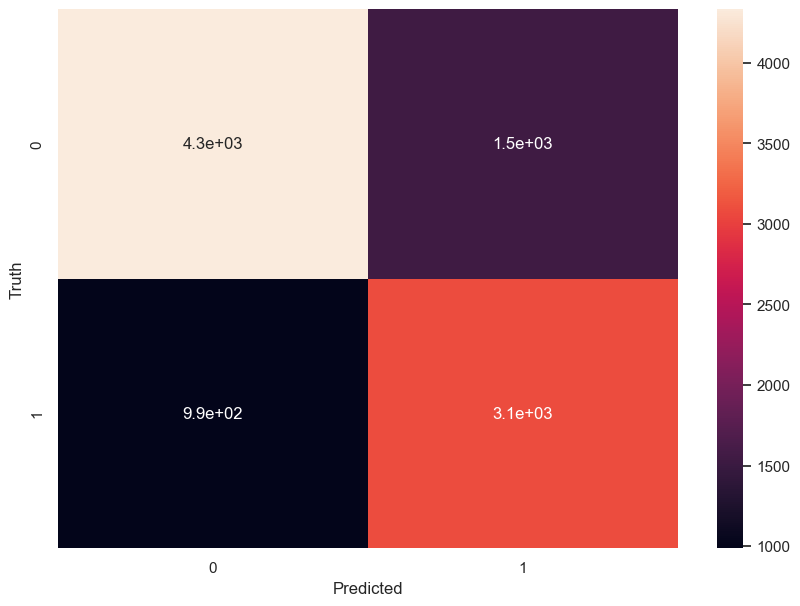

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
tn, fp, fn, tp = cm.ravel()

# Compute the performance metrics
missrate = fn / (fn + tp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity)

# Print the results
print(f"Miss rate: {missrate:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Positive predictive value: {ppv:.4f}")
print(f"Negative predictive value: {npv:.4f}")
print(f"False positive rate: {fpr:.4f}")
print(f"False negative rate: {fnr:.4f}")
print(f"F1 score: {f1:.4f}")

Miss rate: 0.2422
Sensitivity: 0.7578
Specificity: 0.7369
Positive predictive value: 0.6662
Negative predictive value: 0.8144
False positive rate: 0.2631
False negative rate: 0.2422
F1 score: 0.7091
